<a href="https://colab.research.google.com/github/rahmadyn295/studi-independent_orbit/blob/main/Hand_on_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
dataset = pd.read_csv("Data.csv")

print('dataset:', (str(dataset.shape)))

dataset: (15, 4)


In [3]:
dataset

,Country,Age,Salary,Purchased
0,India,34.0,92000.0,Yes
1,Sri lanka,22.0,25000.0,Yes
2,China,31.0,74000.0,Yes
3,Sri lanka,29.0,NaN,No
4,China,55.0,98000.0,Yes
5,India,24.0,30000.0,No
6,Sri lanka,28.0,40000.0,No
7,India,NaN,60000.0,No
8,China,51.0,89000.0,Yes
9,India,44.0,78000.0,Yes


In [4]:
# Memisahkan antara fitur dan label

# Fitur
# iloc[rows,columns] (Slicing pada dataframe)
# Mengambil semua data dalam barisan.
# Mengambil kolom index ke-0 sampai ke-2
X = dataset.iloc[:,:3].values

# Label
# iloc[rows,columns] (Slicing pada dataframe)
# Mengambil semua data dalam barisan.
# Hanya Mengambil kolom index ke-3
Y = dataset.iloc[:,3].values

In [5]:
print ('Fitur (X):', X)
print ('\n-----------------------------------')
print ('\nLabel (Y): ',Y)

Fitur (X): [['India' 34.0 92000.0]
 ['Sri lanka' 22.0 25000.0]
 ['China' 31.0 74000.0]
 ['Sri lanka' 29.0 nan]
 ['China' 55.0 98000.0]
 ['India' 24.0 30000.0]
 ['Sri lanka' 28.0 40000.0]
 ['India' nan 60000.0]
 ['China' 51.0 89000.0]
 ['India' 44.0 78000.0]
 ['Sri lanka' 21.0 20000.0]
 ['China' 25.0 30000.0]
 ['India' 33.0 45000.0]
 ['India' 42.0 65000.0]
 ['Sri lanka' 33.0 22000.0]]

-----------------------------------

Label (Y):  ['Yes' 'Yes' 'Yes' 'No' 'Yes' 'No' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'Yes'
 'Yes' 'No']


In [6]:
dataset.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

In [8]:
from sklearn.impute import SimpleImputer

# SimpleImputer class mempunyai 2 parameter, yaitu :
#     missing_values : Missing value pada data kita, biasanya diisi dengan np.nan
#     strategy       : Strategi yang akan kita gunakan dalam menangani missing value (Mean/Modus/Median).
#                      Defaultnya parameter strategy 'mean'

imputer = SimpleImputer(missing_values = np.nan ,strategy = 'mean')


# Fit imputer kedalam data X untuk kolom Age (index ke-1) dan Salary (index ke-2).
imputer = imputer.fit(X[:,1:3])

#Replace missing value dengan mean pada kolom tersebut
X[:,1:3] = imputer.transform(X[:,1:3])
print ('X: ', X)

X:  [['India' 34.0 92000.0]
 ['Sri lanka' 22.0 25000.0]
 ['China' 31.0 74000.0]
 ['Sri lanka' 29.0 54857.142857142855]
 ['China' 55.0 98000.0]
 ['India' 24.0 30000.0]
 ['Sri lanka' 28.0 40000.0]
 ['India' 33.714285714285715 60000.0]
 ['China' 51.0 89000.0]
 ['India' 44.0 78000.0]
 ['Sri lanka' 21.0 20000.0]
 ['China' 25.0 30000.0]
 ['India' 33.0 45000.0]
 ['India' 42.0 65000.0]
 ['Sri lanka' 33.0 22000.0]]


# SMOTE

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
X, y = make_classification(n_classes=2, class_sep=0.5,
weights=[0.05, 0.95], n_informative=2, n_redundant=0, flip_y=0,
n_features=2, n_clusters_per_class=1, n_samples=1000, random_state=10)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 2) (800,)
Test set: (200, 2) (200,)


<Axes: ylabel='count'>

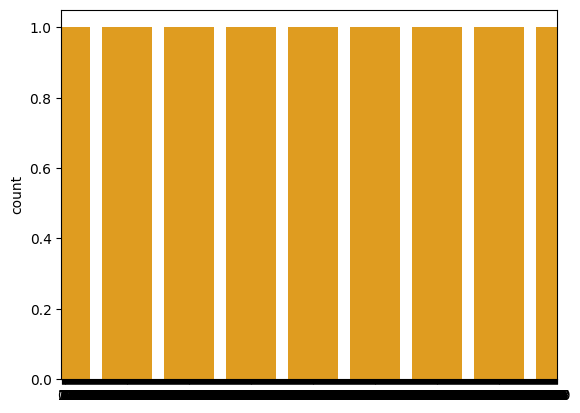

In [25]:
sns.countplot(y, color='orange')

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<Axes: ylabel='count'>

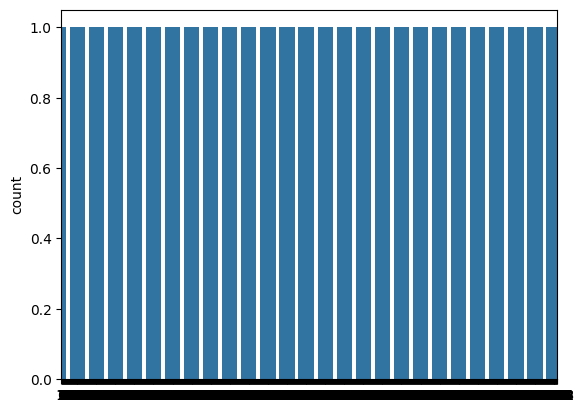

In [17]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=10)
X_res, y_res = sm.fit_resample(X_train, y_train)
sns.countplot(y_res)

In [26]:
data = { 'Names':['Yusuf','Allafa','Abdiel','Ipin','Ibnu','Rifal','Haidar','Yusuf','Yusuf'],
         'Marks':[56,89,90,45,34,65,77,56,56],
         'City' :['Jakarta','Yogyakarta','Solo','Surabaya','Makasar','Malang','Yogyakarta','Jakarta','Jakarta']}

df = pd.DataFrame(data)
df

,Names,Marks,City
0,Yusuf,56,Jakarta
1,Allafa,89,Yogyakarta
2,Abdiel,90,Solo
3,Ipin,45,Surabaya
4,Ibnu,34,Makasar
5,Rifal,65,Malang
6,Haidar,77,Yogyakarta
7,Yusuf,56,Jakarta
8,Yusuf,56,Jakarta


In [27]:
df.drop_duplicates(subset='Names', keep='first')

,Names,Marks,City
0,Yusuf,56,Jakarta
1,Allafa,89,Yogyakarta
2,Abdiel,90,Solo
3,Ipin,45,Surabaya
4,Ibnu,34,Makasar
5,Rifal,65,Malang
6,Haidar,77,Yogyakarta


In [28]:
df.drop_duplicates(subset='Names', keep='last')

,Names,Marks,City
1,Allafa,89,Yogyakarta
2,Abdiel,90,Solo
3,Ipin,45,Surabaya
4,Ibnu,34,Makasar
5,Rifal,65,Malang
6,Haidar,77,Yogyakarta
8,Yusuf,56,Jakarta


In [29]:
df.drop_duplicates(subset='Names', keep=False)

,Names,Marks,City
1,Allafa,89,Yogyakarta
2,Abdiel,90,Solo
3,Ipin,45,Surabaya
4,Ibnu,34,Makasar
5,Rifal,65,Malang
6,Haidar,77,Yogyakarta


In [30]:
df.drop_duplicates(subset='Names', keep=False, inplace=True)
df

,Names,Marks,City
1,Allafa,89,Yogyakarta
2,Abdiel,90,Solo
3,Ipin,45,Surabaya
4,Ibnu,34,Makasar
5,Rifal,65,Malang
6,Haidar,77,Yogyakarta


# Data intergration

In [31]:
# Input Dataset
dataset1 = "/content/Students.csv"
dataset2 = "/content/Mark.csv"

In [32]:
# Define Dataset
df1 = pd.read_csv(dataset1, header = 0)

df2 = pd.read_csv(dataset2, header = 0)


In [33]:
# Cek Dataset
df1.head()

,student ID,gender,race/ethnicity,parental level of education,lunch
0,1,female,group B,bachelor's degree,standard
1,2,female,group C,some college,standard
2,3,female,group B,master's degree,standard
3,4,male,group A,associate's degree,free/reduced
4,5,male,group C,some college,standard


In [34]:
df2.head()

,student ID,test preparation course,math score,reading score,writing score
0,1,none,72,72,74
1,2,completed,69,90,88
2,3,none,90,95,93
3,4,none,47,57,44
4,5,none,76,78,75


In [35]:
# Integrasi Data
df = pd.merge(df1, df2, on = 'student ID')

In [36]:
df.head(10)

,student ID,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,female,group B,bachelor's degree,standard,none,72,72,74
1,2,female,group C,some college,standard,completed,69,90,88
2,3,female,group B,master's degree,standard,none,90,95,93
3,4,male,group A,associate's degree,free/reduced,none,47,57,44
4,5,male,group C,some college,standard,none,76,78,75
5,6,female,group B,associate's degree,standard,none,71,83,78
6,7,female,group B,some college,standard,completed,88,95,92
7,8,male,group B,some college,free/reduced,none,40,43,39
8,9,male,group D,high school,free/reduced,completed,64,64,67
9,10,female,group B,high school,free/reduced,none,38,60,50


# Data transformasi

In [37]:
dataset = pd.read_csv("Data.csv")


# Menampilkan shape dari data yg kita punya
print('dataset:', (str(dataset.shape)))
dataset

dataset: (15, 4)


,Country,Age,Salary,Purchased
0,India,34.0,92000.0,Yes
1,Sri lanka,22.0,25000.0,Yes
2,China,31.0,74000.0,Yes
3,Sri lanka,29.0,NaN,No
4,China,55.0,98000.0,Yes
5,India,24.0,30000.0,No
6,Sri lanka,28.0,40000.0,No
7,India,NaN,60000.0,No
8,China,51.0,89000.0,Yes
9,India,44.0,78000.0,Yes


In [38]:
# Memisahkan antara fitur dan label

# Fitur
# iloc[rows,columns] (Slicing pada dataframe)
# Mengambil semua data dalam barisan.
# Mengambil kolom index ke-0 sampai ke-2
X = dataset.iloc[:,:3].values

# Label
# iloc[rows,columns] (Slicing pada dataframe)
# Mengambil semua data dalam barisan.
# Hanya Mengambil kolom index ke-3
Y = dataset.iloc[:,3].values

In [39]:
# Print the X and Y
print ('Fitur (X):', X)
print ('\n-----------------------------------')
print ('\nLabel (Y): ',Y)

Fitur (X): [['India' 34.0 92000.0]
 ['Sri lanka' 22.0 25000.0]
 ['China' 31.0 74000.0]
 ['Sri lanka' 29.0 nan]
 ['China' 55.0 98000.0]
 ['India' 24.0 30000.0]
 ['Sri lanka' 28.0 40000.0]
 ['India' nan 60000.0]
 ['China' 51.0 89000.0]
 ['India' 44.0 78000.0]
 ['Sri lanka' 21.0 20000.0]
 ['China' 25.0 30000.0]
 ['India' 33.0 45000.0]
 ['India' 42.0 65000.0]
 ['Sri lanka' 33.0 22000.0]]

-----------------------------------

Label (Y):  ['Yes' 'Yes' 'Yes' 'No' 'Yes' 'No' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'Yes'
 'Yes' 'No']


In [40]:
from sklearn.impute import SimpleImputer

# SimpleImputer class mempunyai 2 parameter, yaitu :
#     missing_values : Missing value pada data kita, biasanya diisi dengan np.nan
#     strategy       : Strategi yang akan kita gunakan dalam menangani missing value (Mean/Modus/Median).
#                      Defaultnya parameter strategy 'mean'

imputer = SimpleImputer(missing_values = np.nan ,strategy = 'mean')


# Fit imputer kedalam data X untuk kolom Age (index ke-1) dan Salary (index ke-2).
imputer = imputer.fit(X[:,1:3])

#Replace missing value dengan mean pada kolom tersebut
X[:,1:3] = imputer.transform(X[:,1:3])

# Encode the Categorical data

In [41]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#Encode untuk data kategorikal pada kolom 'Country'
labelencoder_X = LabelEncoder()
X[:,0] = labelencoder_X.fit_transform(X[:,0])
X[:,0]

array([1, 2, 0, 2, 0, 1, 2, 1, 0, 1, 2, 0, 1, 1, 2], dtype=object)

In [42]:
X

array([[1, 34.0, 92000.0],
       [2, 22.0, 25000.0],
       [0, 31.0, 74000.0],
       [2, 29.0, 54857.142857142855],
       [0, 55.0, 98000.0],
       [1, 24.0, 30000.0],
       [2, 28.0, 40000.0],
       [1, 33.714285714285715, 60000.0],
       [0, 51.0, 89000.0],
       [1, 44.0, 78000.0],
       [2, 21.0, 20000.0],
       [0, 25.0, 30000.0],
       [1, 33.0, 45000.0],
       [1, 42.0, 65000.0],
       [2, 33.0, 22000.0]], dtype=object)

In [43]:
#Encode untuk data kategorikal pada kolom 'Purchased'
labelencoder_Y = LabelEncoder()
Y = labelencoder_X.fit_transform(Y)
Y

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0])

In [44]:
#scale your fiture
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()

# We need to fit and transform the training set
X = sc_X.fit_transform(X)

In [45]:
X

array([[-0.08638684,  0.02897151,  1.42592213],
       [ 1.2094158 , -1.1878321 , -1.14622202],
       [-1.38218948, -0.27522939,  0.73489833],
       [ 1.2094158 , -0.47802999,  0.        ],
       [-1.38218948,  2.15837785,  1.6562634 ],
       [-0.08638684, -0.9850315 , -0.95427097],
       [ 1.2094158 , -0.57943029, -0.57036885],
       [-0.08638684,  0.        ,  0.19743537],
       [-1.38218948,  1.75277664,  1.3107515 ],
       [-0.08638684,  1.04297453,  0.88845917],
       [ 1.2094158 , -1.28923241, -1.33817308],
       [-1.38218948, -0.8836312 , -0.95427097],
       [-0.08638684, -0.07242879, -0.3784178 ],
       [-0.08638684,  0.84017393,  0.38938643],
       [ 1.2094158 , -0.07242879, -1.26139266]])